In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
train.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'form-ambility', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing']
train.replace({"?":None},inplace=True)
print(train.count())

ValueError: Length mismatch: Expected axis has 39 elements, new values have 38 elements

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree


test = pd.read_csv("test.csv")
test.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing']
train = pd.read_csv("train.csv")
test.replace({"?":None},inplace=True)
train.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing','class']
train.replace({"?":None},inplace=True)


for i in train:
    if(train.count()[i])<100:
        del train[i]
        del test[i]



train['family'] = train['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(train))))
test['family'] = test['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(test))))
# print(train['family'])

count = {}
c = 0
for each in train["family"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)


count = {}
c = 0
for each in train["product-type"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

# print(list)

del train['product-type']
del test['product-type']

count = {}
c = 0
for each in train["steel"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

train['steel'] = train['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(train))))
test['steel'] = test['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(test))))

del train['temper-rolling']
del test['temper-rolling']

train['condition'] = train['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(train))))
test['condition'] = test['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(test))))

train['formability'] = train['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(train))))
test['formability'] = test['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(test))))

train['surface-quality'] = train['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(train))))
test['surface-quality'] = test['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(test))))

del train['bf']
del test['bf']

train['bw/me'] = train['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(train))))
test['bw/me'] = test['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(test))))

del train['bl']
del test['bl']

family = pd.get_dummies(train["family"])
for key in family:
    train["family:"+key] = family[key]
del (train["family"])

family = pd.get_dummies(test["family"])
for key in family:
    test["family:"+key] = family[key]
del (test["family"])

steel = pd.get_dummies(train["steel"])
for key in steel:
    train["steel:"+key] = steel[key]
del (train["steel"])

steel = pd.get_dummies(test["steel"])
for key in steel:
    test["steel:"+key] = steel[key]
del (test["steel"])

condition = pd.get_dummies(train["condition"])
for key in condition:
    train["condition:"+key] = condition[key]
del (train["condition"])

condition = pd.get_dummies(test["condition"])
for key in condition:
    test["condition:"+key] = condition[key]
del (test["condition"])

formability = pd.get_dummies(train["formability"])
for key in formability:
    train["formability:"+key] = formability[key]
del (train["formability"])

formability = pd.get_dummies(test["formability"])
for key in formability:
    test["formability:"+key] = formability[key]
del (test["formability"])

surfaceQuality = pd.get_dummies(train["surface-quality"])
for key in surfaceQuality:
    train["surface-quality:"+key] = surfaceQuality[key]
del (train["surface-quality"])

surfaceQuality = pd.get_dummies(test["surface-quality"])
for key in surfaceQuality:
    test["surface-quality:"+key] = surfaceQuality[key]
del (test["surface-quality"])

bwme = pd.get_dummies(train["bw/me"])
for key in bwme:
    train["bw/me:"+key] = bwme[key]
del (train["bw/me"])

bwme = pd.get_dummies(test["bw/me"])
for key in bwme:
    test["bw/me:"+key] = bwme[key]
del (test["bw/me"])

shape = pd.get_dummies(train["shape"])
for key in shape:
    train["shape:"+key] = shape[key]
del (train["shape"])

shape = pd.get_dummies(test["shape"])
for key in shape:
    test["shape:"+key] = shape[key]
del (test["shape"])

output = train["class"]
input = train
del input["class"]

clf = tree.DecisionTreeClassifier()
clf.fit(input,output)
clf.fit(input,output)
# print(clf.score(input,output))
# train.to_csv('/Users/aisanaghazade/DM-HW2/preprocessedData.csv')
print(train.count())

carbon               797
hardness             797
strength             797
thick                797
width                797
len                  797
bore                 797
family:TN            797
family:ZS            797
steel:A              797
steel:K              797
steel:M              797
steel:R              797
steel:S              797
steel:V              797
steel:W              797
condition:A          797
condition:S          797
formability:1        797
formability:2        797
formability:3        797
formability:5        797
surface-quality:D    797
surface-quality:E    797
surface-quality:F    797
surface-quality:G    797
bw/me:B              797
bw/me:M              797
shape:COIL           797
shape:SHEET          797
dtype: int64


In [2]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [3]:
import graphviz

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [5]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree


test = pd.read_csv("test.csv")
test.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing']
train = pd.read_csv("train.csv")
test.replace({"?":None},inplace=True)
train.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing','class']
train.replace({"?":None},inplace=True)


for i in train:
    if(train.count()[i])<100:
        del train[i]
        del test[i]



train['family'] = train['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(train))))
test['family'] = test['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(test))))
# print(train['family'])

count = {}
c = 0
for each in train["family"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)


count = {}
c = 0
for each in train["product-type"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

# print(list)

del train['product-type']
del test['product-type']

count = {}
c = 0
for each in train["steel"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

train['steel'] = train['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(train))))
test['steel'] = test['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(test))))

del train['temper-rolling']
del test['temper-rolling']

train['condition'] = train['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(train))))
test['condition'] = test['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(test))))

train['formability'] = train['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(train))))
test['formability'] = test['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(test))))

train['surface-quality'] = train['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(train))))
test['surface-quality'] = test['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(test))))

del train['bf']
del test['bf']

train['bw/me'] = train['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(train))))
test['bw/me'] = test['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(test))))

del train['bl']
del test['bl']

family = pd.get_dummies(train["family"])
for key in family:
    train["family:"+key] = family[key]
del (train["family"])

family = pd.get_dummies(test["family"])
for key in family:
    test["family:"+key] = family[key]
del (test["family"])

steel = pd.get_dummies(train["steel"])
for key in steel:
    train["steel:"+key] = steel[key]
del (train["steel"])

steel = pd.get_dummies(test["steel"])
for key in steel:
    test["steel:"+key] = steel[key]
del (test["steel"])

condition = pd.get_dummies(train["condition"])
for key in condition:
    train["condition:"+key] = condition[key]
del (train["condition"])

condition = pd.get_dummies(test["condition"])
for key in condition:
    test["condition:"+key] = condition[key]
del (test["condition"])

formability = pd.get_dummies(train["formability"])
for key in formability:
    train["formability:"+key] = formability[key]
del (train["formability"])

formability = pd.get_dummies(test["formability"])
for key in formability:
    test["formability:"+key] = formability[key]
del (test["formability"])

surfaceQuality = pd.get_dummies(train["surface-quality"])
for key in surfaceQuality:
    train["surface-quality:"+key] = surfaceQuality[key]
del (train["surface-quality"])

surfaceQuality = pd.get_dummies(test["surface-quality"])
for key in surfaceQuality:
    test["surface-quality:"+key] = surfaceQuality[key]
del (test["surface-quality"])

bwme = pd.get_dummies(train["bw/me"])
for key in bwme:
    train["bw/me:"+key] = bwme[key]
del (train["bw/me"])

bwme = pd.get_dummies(test["bw/me"])
for key in bwme:
    test["bw/me:"+key] = bwme[key]
del (test["bw/me"])

shape = pd.get_dummies(train["shape"])
for key in shape:
    train["shape:"+key] = shape[key]
del (train["shape"])

shape = pd.get_dummies(test["shape"])
for key in shape:
    test["shape:"+key] = shape[key]
del (test["shape"])

output = train["class"]
input = train
del input["class"]

clf = tree.DecisionTreeClassifier()
clf.fit(input[0:683],output[0:683])

print(clf.score(input[684:796],output[684:796]))
max_depth={}
for i in range(1,100,3):
    clf.set_params(max_depth = i)
    clf.fit(input[0:683],output[0:683])
    max_depth[i]=clf.score(input[684:796],output[684:796])
print(max_depth)
# train.to_csv('/Users/aisanaghazade/DM-HW2/preprocessedData.csv')
# print(train.count())

0.9375


{1: 0.8035714285714286, 4: 0.8035714285714286, 7: 0.875, 10: 0.9285714285714286, 13: 0.9375, 16: 0.9285714285714286, 19: 0.9375, 22: 0.9375, 25: 0.9375, 28: 0.9375, 31: 0.9375, 34: 0.9285714285714286, 37: 0.9285714285714286, 40: 0.9285714285714286, 43: 0.9375, 46: 0.9285714285714286, 49: 0.9375, 52: 0.9375, 55: 0.9375, 58: 0.9285714285714286, 61: 0.9375, 64: 0.9375, 67: 0.9375, 70: 0.9375, 73: 0.9375, 76: 0.9375, 79: 0.9375, 82: 0.9375, 85: 0.9375, 88: 0.9375, 91: 0.9375, 94: 0.9375, 97: 0.9375}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (5, 30) and (797, 30)

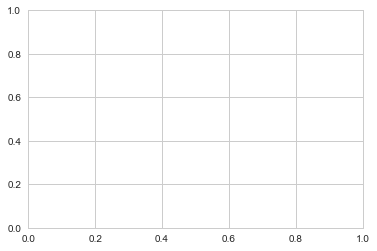

In [3]:
plt.plot(train.head(),train)

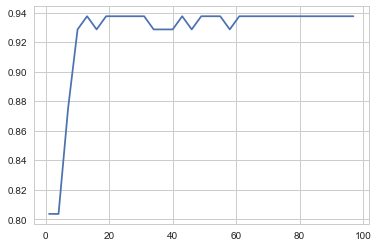

In [4]:
list1 = []
list2 = []
for i in max_depth:
    list1.append(i)
    list2.append(max_depth[i])

plt.plot(list1,list2)

In [5]:
min_samples_split={}
for i in range(2,100,3):
    clf.set_params(min_samples_split = i)
    clf.fit(input[0:683],output[0:683])
    min_samples_split[i]=clf.score(input[684:796],output[684:796])
print(min_samples_split)

{2: 0.9375, 5: 0.9375, 8: 0.9285714285714286, 11: 0.9285714285714286, 14: 0.9285714285714286, 17: 0.9196428571428571, 20: 0.9107142857142857, 23: 0.9107142857142857, 26: 0.9017857142857143, 29: 0.9017857142857143, 32: 0.9107142857142857, 35: 0.9017857142857143, 38: 0.9017857142857143, 41: 0.9017857142857143, 44: 0.9017857142857143, 47: 0.8839285714285714, 50: 0.8660714285714286, 53: 0.8660714285714286, 56: 0.8392857142857143, 59: 0.8392857142857143, 62: 0.8214285714285714, 65: 0.8214285714285714, 68: 0.8214285714285714, 71: 0.8214285714285714, 74: 0.8214285714285714, 77: 0.8214285714285714, 80: 0.8214285714285714, 83: 0.8214285714285714, 86: 0.8214285714285714, 89: 0.8214285714285714, 92: 0.8214285714285714, 95: 0.8214285714285714, 98: 0.8214285714285714}


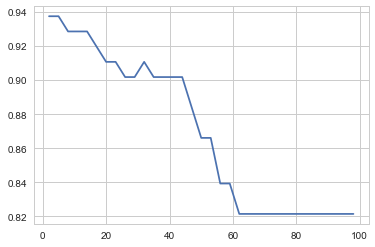

In [6]:
list1 = []
list2 = []
for i in min_samples_split:
    list1.append(i)
    list2.append(min_samples_split[i])

plt.plot(list1,list2)

{'gini': 0.8214285714285714, 'entropy': 0.8839285714285714}


ValueError: could not convert string to float: 'gini'

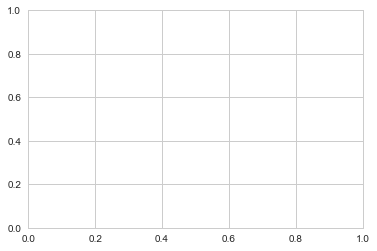

In [7]:
criterion={}
for i in ['gini' , 'entropy']:
    clf.set_params(criterion = i)
    clf.fit(input[0:683],output[0:683])
    criterion[i]=clf.score(input[684:796],output[684:796])
print(criterion)
list1 = []
list2 = []
for i in criterion:
    list1.append(i)
    list2.append(criterion[i])

plt.plot(list1,list2)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

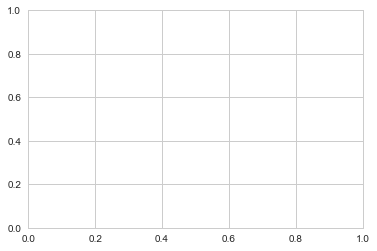

In [8]:
plt.bar(list1,list2)

{1: 0.7946428571428571, 2: 0.8035714285714286, 3: 0.8392857142857143, 4: 0.7678571428571429, 5: 0.8660714285714286, 6: 0.8214285714285714, 7: 0.7946428571428571, 8: 0.8125, 9: 0.8035714285714286, 10: 0.8125, 11: 0.7857142857142857, 12: 0.8035714285714286, 13: 0.7857142857142857, 14: 0.875, 15: 0.8482142857142857, 16: 0.8839285714285714, 17: 0.8928571428571429, 18: 0.8839285714285714, 19: 0.8660714285714286, 20: 0.8839285714285714, 21: 0.8303571428571429, 22: 0.8571428571428571, 23: 0.8660714285714286, 24: 0.8214285714285714, 25: 0.8839285714285714, 26: 0.8839285714285714, 27: 0.8839285714285714, 28: 0.8839285714285714, 29: 0.8839285714285714, 30: 0.8839285714285714}


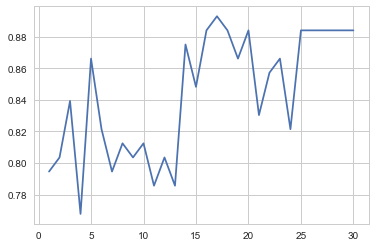

In [9]:
max_features={}
for i in range(0,30):
    clf.set_params(max_features = i+1)
    clf.fit(input[0:683],output[0:683])
    max_features[i+1]=clf.score(input[684:796],output[684:796])
print(max_features)
list1 = []
list2 = []
for i in max_features:
    list1.append(i)
    list2.append(max_features[i])

plt.plot(list1,list2)

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
{1: 0.8392857142857143, 2: 0.8214285714285714, 3: 0.9017857142857143, 4: 0.8928571428571429, 5: 0.8839285714285714, 6: 0.8928571428571429, 7: 0.9285714285714286, 8: 0.8928571428571429, 9: 0.9196428571428571, 10: 0.8660714285714286, 11: 0.9375, 12: 0.8839285714285714, 13: 0.8660714285714286, 14: 0.8928571428571429, 15: 0.9375, 16: 0.9196428571428571, 17: 0.9017857142857143, 18: 0.8928571428571429, 19: 0.8660714285714286, 20: 0.9464285714285714, 21: 0.9017857142857143, 22: 0.9196428571428571, 23: 0.9285714285714286, 24: 0.9107142857142857, 25: 0.9285714285714286, 26: 0.9375, 27: 0.9107142857142857, 28: 0.9375, 29: 0.9196428571428571, 30: 0.9196428571428571}


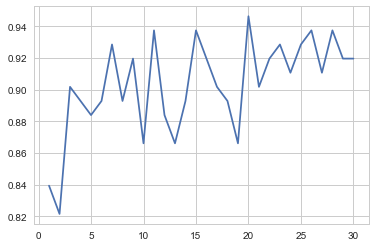

In [10]:
import pandas as pd
import numpy as np
from sklearn import tree
import random


test = pd.read_csv("test.csv")
test.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing']
train = pd.read_csv("train.csv")
test.replace({"?":None},inplace=True)
train.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing','class']
train.replace({"?":None},inplace=True)


for i in train:
    if(train.count()[i])<100:
        del train[i]
        del test[i]



train['family'] = train['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(train))))
test['family'] = test['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(test))))
# print(train['family'])

count = {}
c = 0
for each in train["family"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)


count = {}
c = 0
for each in train["product-type"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

# print(list)

del train['product-type']
del test['product-type']

count = {}
c = 0
for each in train["steel"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

train['steel'] = train['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(train))))
test['steel'] = test['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(test))))

del train['temper-rolling']
del test['temper-rolling']

train['condition'] = train['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(train))))
test['condition'] = test['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(test))))

train['formability'] = train['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(train))))
test['formability'] = test['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(test))))

train['surface-quality'] = train['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(train))))
test['surface-quality'] = test['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(test))))

del train['bf']
del test['bf']

train['bw/me'] = train['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(train))))
test['bw/me'] = test['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(test))))

del train['bl']
del test['bl']

family = pd.get_dummies(train["family"])
for key in family:
    train["family:"+key] = family[key]
del (train["family"])

family = pd.get_dummies(test["family"])
for key in family:
    test["family:"+key] = family[key]
del (test["family"])

steel = pd.get_dummies(train["steel"])
for key in steel:
    train["steel:"+key] = steel[key]
del (train["steel"])

steel = pd.get_dummies(test["steel"])
for key in steel:
    test["steel:"+key] = steel[key]
del (test["steel"])

condition = pd.get_dummies(train["condition"])
for key in condition:
    train["condition:"+key] = condition[key]
del (train["condition"])

condition = pd.get_dummies(test["condition"])
for key in condition:
    test["condition:"+key] = condition[key]
del (test["condition"])

formability = pd.get_dummies(train["formability"])
for key in formability:
    train["formability:"+key] = formability[key]
del (train["formability"])

formability = pd.get_dummies(test["formability"])
for key in formability:
    test["formability:"+key] = formability[key]
del (test["formability"])

surfaceQuality = pd.get_dummies(train["surface-quality"])
for key in surfaceQuality:
    train["surface-quality:"+key] = surfaceQuality[key]
del (train["surface-quality"])

surfaceQuality = pd.get_dummies(test["surface-quality"])
for key in surfaceQuality:
    test["surface-quality:"+key] = surfaceQuality[key]
del (test["surface-quality"])

bwme = pd.get_dummies(train["bw/me"])
for key in bwme:
    train["bw/me:"+key] = bwme[key]
del (train["bw/me"])

bwme = pd.get_dummies(test["bw/me"])
for key in bwme:
    test["bw/me:"+key] = bwme[key]
del (test["bw/me"])

shape = pd.get_dummies(train["shape"])
for key in shape:
    train["shape:"+key] = shape[key]
del (train["shape"])

shape = pd.get_dummies(test["shape"])
for key in shape:
    test["shape:"+key] = shape[key]
del (test["shape"])

output = train["class"]
input = train
del input["class"]

clf = tree.DecisionTreeClassifier()
clf.fit(input[0:683],output[0:683])
print(clf.get_params())
# print(clf.score(input[684:796],output[684:796]))
# max_depth={}
# for i in range(1,100,3):
#     clf.set_params(max_depth = i)
#     clf.fit(input[0:683],output[0:683])
#     max_depth[i]=clf.score(input[684:796],output[684:796])
# print(max_depth)
# # train.to_csv('/Users/aisanaghazade/DM-HW2/preprocessedData.csv')
# # print(train.count())
#
# min_samples_split={}
# for i in range(2,100,3):
#     clf.set_params(min_samples_split = i)
#     clf.fit(input[0:683],output[0:683])
#     min_samples_split[i]=clf.score(input[684:796],output[684:796])
# print(min_samples_split)
#
# criterion={}
# for i in ['gini' , 'entropy']:
#     clf.set_params(criterion = i)
#     clf.fit(input[0:683],output[0:683])
#     criterion[i]=clf.score(input[684:796],output[684:796])
# print(criterion)


max_features={}
for i in range(0,30):
    clf.set_params(max_features = i+1)
    clf.fit(input[0:683],output[0:683])
    max_features[i+1]=clf.score(input[684:796],output[684:796])
print(max_features)
list1 = []
list2 = []
for i in max_features:
    list1.append(i)
    list2.append(max_features[i])

plt.plot(list1,list2)

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
{2: 0.8035714285714286, 5: 0.8035714285714286, 8: 0.7946428571428571, 11: 0.8303571428571429, 14: 0.8392857142857143, 17: 0.8839285714285714, 20: 0.9017857142857143, 23: 0.9107142857142857, 26: 0.8839285714285714, 29: 0.9196428571428571, 32: 0.9285714285714286, 35: 0.9375, 38: 0.9375, 41: 0.9375, 44: 0.9107142857142857, 47: 0.9464285714285714, 50: 0.9464285714285714, 53: 0.9464285714285714, 56: 0.9285714285714286, 59: 0.9196428571428571, 62: 0.9285714285714286, 65: 0.9375, 68: 0.9196428571428571, 71: 0.9285714285714286, 74: 0.9375, 77: 0.9375, 80: 0.9196428571428571, 83: 0.9196428571428571, 86: 0.9196428571428571, 89: 0.9375, 92: 0.9375, 95: 0.9375, 98: 0.9375}
thick:0.252801655988
{'carbon': 0.058545647297488845

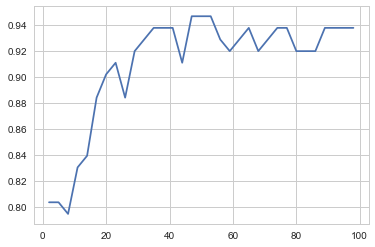

In [12]:
import pandas as pd
import numpy as np
from sklearn import tree
import random


test = pd.read_csv("test.csv")
test.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing']
train = pd.read_csv("train.csv")
test.replace({"?":None},inplace=True)
train.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing','class']
train.replace({"?":None},inplace=True)
# print(train.count())


for i in train:
    if(train.count()[i])<100:
        del train[i]
        del test[i]



train['family'] = train['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(train))))
test['family'] = test['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(test))))
# print(train['family'])

count = {}
c = 0
for each in train["family"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)


count = {}
c = 0
for each in train["product-type"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

# print(list)

del train['product-type']
del test['product-type']

count = {}
c = 0
for each in train["steel"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

train['steel'] = train['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(train))))
test['steel'] = test['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(test))))

del train['temper-rolling']
del test['temper-rolling']

train['condition'] = train['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(train))))
test['condition'] = test['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(test))))

train['formability'] = train['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(train))))
test['formability'] = test['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(test))))

train['surface-quality'] = train['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(train))))
test['surface-quality'] = test['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(test))))

del train['bf']
del test['bf']

train['bw/me'] = train['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(train))))
test['bw/me'] = test['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(test))))

del train['bl']
del test['bl']

family = pd.get_dummies(train["family"])
for key in family:
    train["family:"+key] = family[key]
del (train["family"])

family = pd.get_dummies(test["family"])
for key in family:
    test["family:"+key] = family[key]
del (test["family"])

steel = pd.get_dummies(train["steel"])
for key in steel:
    train["steel:"+key] = steel[key]
del (train["steel"])

steel = pd.get_dummies(test["steel"])
for key in steel:
    test["steel:"+key] = steel[key]
del (test["steel"])

condition = pd.get_dummies(train["condition"])
for key in condition:
    train["condition:"+key] = condition[key]
del (train["condition"])

condition = pd.get_dummies(test["condition"])
for key in condition:
    test["condition:"+key] = condition[key]
del (test["condition"])

formability = pd.get_dummies(train["formability"])
for key in formability:
    train["formability:"+key] = formability[key]
del (train["formability"])

formability = pd.get_dummies(test["formability"])
for key in formability:
    test["formability:"+key] = formability[key]
del (test["formability"])

surfaceQuality = pd.get_dummies(train["surface-quality"])
for key in surfaceQuality:
    train["surface-quality:"+key] = surfaceQuality[key]
del (train["surface-quality"])

surfaceQuality = pd.get_dummies(test["surface-quality"])
for key in surfaceQuality:
    test["surface-quality:"+key] = surfaceQuality[key]
del (test["surface-quality"])

bwme = pd.get_dummies(train["bw/me"])
for key in bwme:
    train["bw/me:"+key] = bwme[key]
del (train["bw/me"])

bwme = pd.get_dummies(test["bw/me"])
for key in bwme:
    test["bw/me:"+key] = bwme[key]
del (test["bw/me"])

shape = pd.get_dummies(train["shape"])
for key in shape:
    train["shape:"+key] = shape[key]
del (train["shape"])

shape = pd.get_dummies(test["shape"])
for key in shape:
    test["shape:"+key] = shape[key]
del (test["shape"])

output = train["class"]
input = train
del input["class"]
clf = tree.DecisionTreeClassifier()
clf.fit(input[0:683],output[0:683])
print(clf.get_params())
# print(clf.score(input[684:796],output[684:796]))
# max_depth={}
# for i in range(1,100,3):
#     clf.set_params(max_depth = i)
#     clf.fit(input[0:683],output[0:683])
#     max_depth[i]=clf.score(input[684:796],output[684:796])
# print(max_depth)
# # train.to_csv('/Users/aisanaghazade/DM-HW2/preprocessedData.csv')
# # print(train.count())
#
# min_samples_split={}
# for i in range(2,100,3):
#     clf.set_params(min_samples_split = i)
#     clf.fit(input[0:683],output[0:683])
#     min_samples_split[i]=clf.score(input[684:796],output[684:796])
# print(min_samples_split)
#
# criterion={}
# for i in ['gini' , 'entropy']:
#     clf.set_params(criterion = i)
#     clf.fit(input[0:683],output[0:683])
#     criterion[i]=clf.score(input[684:796],output[684:796])
# print(criterion)


# max_features={}
# for i in range(0,30):
#     clf.set_params(max_features = i+1)
#     clf.fit(input[0:683],output[0:683])
#     max_features[i+1]=clf.score(input[684:796],output[684:796])
# print(max_features)

max_leaf_nodes={}
for i in range(2,100,3):
    clf.set_params(max_leaf_nodes = i)
    clf.fit(input[0:683],output[0:683])
    max_leaf_nodes[i]=clf.score(input[684:796],output[684:796])
print(max_leaf_nodes)

importance = {}
count = 0
importances = clf.feature_importances_
max = 0
for i in train.columns.values:
    importance[i] = importances[count]
    if max <= importance[i]:
        max = importance[i]
        key = i
    count += 1
print(key+":"+str(max))
print(importance)

clf.set_params(class_weight = {'carbon': 0.075188922146897305, 'hardness': 0.1980617720548529, 'strength': 0.053046715496272032, 'thick': 0.20300908730684078, 'width': 0.071308823735475688, 'len': 0.017466777928670223, 'bore': 0.0, 'family:TN': 0.068611371227633056, 'family:ZS': 0.0036277878992292943, 'steel:A': 0.054227687686137956, 'steel:K': 0.0, 'steel:M': 0.0041342312241929241, 'steel:R': 0.0048370505323057254, 'steel:S': 0.022062951857985163, 'steel:V': 0.012752049356432378, 'steel:W': 0.020384085909281119, 'condition:A': 0.013024163574426057, 'condition:S': 0.0030231565826910806, 'formability:1': 0.0066383240939091427, 'formability:2': 0.064305148431232334, 'formability:3': 0.008350799658481128, 'formability:5': 0.0, 'surface-quality:D': 0.0070627005756202345, 'surface-quality:E': 0.028063623058253728, 'surface-quality:F': 0.0, 'surface-quality:G': 0.0028146630252641031, 'bw/me:B': 0.0096741010646114525, 'bw/me:M': 0.0096741010646114525, 'shape:COIL': 0.012334478857379601, 'shape:SHEET': 0.026315425651313042})
print(clf.get_params())
list1 = []
list2 = []
for i in max_leaf_nodes:
    list1.append(i)
    list2.append(max_leaf_nodes[i])

plt.plot(list1,list2)

In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
import random


test = pd.read_csv("test.csv")
test.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing']
train = pd.read_csv("train.csv")
test.replace({"?":None},inplace=True)
train.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper-rolling', 'condition', 'formability', 'strength', 'non-aging', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phose', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/brigh/varn/clean', 'lustre', 'jurofm','s', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing','class']
train.replace({"?":None},inplace=True)
# print(train.count())


for i in train:
    if(train.count()[i])<100:
        del train[i]
        del test[i]



train['family'] = train['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(train))))
test['family'] = test['family'].fillna(pd.Series(np.random.choice(['TN', 'ZS'], p=[60/111, 51/111], size=len(test))))
# print(train['family'])

count = {}
c = 0
for each in train["family"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)


count = {}
c = 0
for each in train["product-type"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

# print(list)

del train['product-type']
del test['product-type']

count = {}
c = 0
for each in train["steel"]:
    try:
        count[str(each)] = count[str(each)] + 1
    except:
        count[str(each)] = 1
        c+= 1
# print(count)
list = []
for i in count:
    if not(str(i) == str(None)):
        list.append(i)

train['steel'] = train['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(train))))
test['steel'] = test['steel'].fillna(pd.Series(np.random.choice(['R', 'A', 'K', 'S', 'W', 'M', 'V'], p=[231/727, 396/727, 44/727, 9/727, 17/727, 17/727, 13/727], size=len(test))))

del train['temper-rolling']
del test['temper-rolling']

train['condition'] = train['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(train))))
test['condition'] = test['condition'].fillna(pd.Series(np.random.choice(['S', 'A'], p=[494/526, 32/526], size=len(test))))

train['formability'] = train['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(train))))
test['formability'] = test['formability'].fillna(pd.Series(np.random.choice(['2', '3', '1', '5'], p=[338/515, 128/515, 40/515,9/515], size=len(test))))

train['surface-quality'] = train['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(train))))
test['surface-quality'] = test['surface-quality'].fillna(pd.Series(np.random.choice(['E', 'G', 'D', 'F'], p=[278/580, 199/580, 50/580, 53/580], size=len(test))))

del train['bf']
del test['bf']

train['bw/me'] = train['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(train))))
test['bw/me'] = test['bw/me'].fillna(pd.Series(np.random.choice(['B', 'M'], p=[146/189, 43/189], size=len(test))))

del train['bl']
del test['bl']

family = pd.get_dummies(train["family"])
for key in family:
    train["family:"+key] = family[key]
del (train["family"])

family = pd.get_dummies(test["family"])
for key in family:
    test["family:"+key] = family[key]
del (test["family"])

steel = pd.get_dummies(train["steel"])
for key in steel:
    train["steel:"+key] = steel[key]
del (train["steel"])

steel = pd.get_dummies(test["steel"])
for key in steel:
    test["steel:"+key] = steel[key]
del (test["steel"])

condition = pd.get_dummies(train["condition"])
for key in condition:
    train["condition:"+key] = condition[key]
del (train["condition"])

condition = pd.get_dummies(test["condition"])
for key in condition:
    test["condition:"+key] = condition[key]
del (test["condition"])

formability = pd.get_dummies(train["formability"])
for key in formability:
    train["formability:"+key] = formability[key]
del (train["formability"])

formability = pd.get_dummies(test["formability"])
for key in formability:
    test["formability:"+key] = formability[key]
del (test["formability"])

surfaceQuality = pd.get_dummies(train["surface-quality"])
for key in surfaceQuality:
    train["surface-quality:"+key] = surfaceQuality[key]
del (train["surface-quality"])

surfaceQuality = pd.get_dummies(test["surface-quality"])
for key in surfaceQuality:
    test["surface-quality:"+key] = surfaceQuality[key]
del (test["surface-quality"])

bwme = pd.get_dummies(train["bw/me"])
for key in bwme:
    train["bw/me:"+key] = bwme[key]
del (train["bw/me"])

bwme = pd.get_dummies(test["bw/me"])
for key in bwme:
    test["bw/me:"+key] = bwme[key]
del (test["bw/me"])

shape = pd.get_dummies(train["shape"])
for key in shape:
    train["shape:"+key] = shape[key]
del (train["shape"])

shape = pd.get_dummies(test["shape"])
for key in shape:
    test["shape:"+key] = shape[key]
del (test["shape"])

output = train["class"]
input = train
del input["class"]
clf = tree.DecisionTreeClassifier()
clf.fit(input[0:683],output[0:683])
print(clf.get_params())
# print(clf.score(input[684:796],output[684:796]))
# max_depth={}
# for i in range(1,100,3):
#     clf.set_params(max_depth = i)
#     clf.fit(input[0:683],output[0:683])
#     max_depth[i]=clf.score(input[684:796],output[684:796])
# print(max_depth)
# # train.to_csv('/Users/aisanaghazade/DM-HW2/preprocessedData.csv')
# # print(train.count())
#
# min_samples_split={}
# for i in range(2,100,3):
#     clf.set_params(min_samples_split = i)
#     clf.fit(input[0:683],output[0:683])
#     min_samples_split[i]=clf.score(input[684:796],output[684:796])
# print(min_samples_split)
#
# criterion={}
# for i in ['gini' , 'entropy']:
#     clf.set_params(criterion = i)
#     clf.fit(input[0:683],output[0:683])
#     criterion[i]=clf.score(input[684:796],output[684:796])
# print(criterion)


# max_features={}
# for i in range(0,30):
#     clf.set_params(max_features = i+1)
#     clf.fit(input[0:683],output[0:683])
#     max_features[i+1]=clf.score(input[684:796],output[684:796])
# print(max_features)

# max_leaf_nodes={}
# for i in range(2,100,3):
#     clf.set_params(max_leaf_nodes = i)
#     clf.fit(input[0:683],output[0:683])
#     max_leaf_nodes[i]=clf.score(input[684:796],output[684:796])
# print(max_leaf_nodes)

min_samples_leaf={}
for i in range(2,100,3):
    clf.set_params(min_sample_leaf = i)
    clf.fit(input[0:683],output[0:683])
    min_samples_leaf[i]=clf.score(input[684:796],output[684:796])
print(min_samples_leaf)

importance = {}
count = 0
importances = clf.feature_importances_
max = 0
for i in train.columns.values:
    importance[i] = importances[count]
    if max <= importance[i]:
        max = importance[i]
        key = i
    count += 1
print(key+":"+str(max))
print(importance)

clf.set_params(class_weight = {'carbon': 0.075188922146897305, 'hardness': 0.1980617720548529, 'strength': 0.053046715496272032, 'thick': 0.20300908730684078, 'width': 0.071308823735475688, 'len': 0.017466777928670223, 'bore': 0.0, 'family:TN': 0.068611371227633056, 'family:ZS': 0.0036277878992292943, 'steel:A': 0.054227687686137956, 'steel:K': 0.0, 'steel:M': 0.0041342312241929241, 'steel:R': 0.0048370505323057254, 'steel:S': 0.022062951857985163, 'steel:V': 0.012752049356432378, 'steel:W': 0.020384085909281119, 'condition:A': 0.013024163574426057, 'condition:S': 0.0030231565826910806, 'formability:1': 0.0066383240939091427, 'formability:2': 0.064305148431232334, 'formability:3': 0.008350799658481128, 'formability:5': 0.0, 'surface-quality:D': 0.0070627005756202345, 'surface-quality:E': 0.028063623058253728, 'surface-quality:F': 0.0, 'surface-quality:G': 0.0028146630252641031, 'bw/me:B': 0.0096741010646114525, 'bw/me:M': 0.0096741010646114525, 'shape:COIL': 0.012334478857379601, 'shape:SHEET': 0.026315425651313042})
print(clf.get_params())

print(clf.get_params())
list1 = []
list2 = []
for i in max_leaf_nodes:
    list1.append(i)
    list2.append(max_leaf_nodes[i])

plt.plot(list1,list2)

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


ValueError: Invalid parameter min_sample_leaf for estimator DecisionTreeClassifier. Check the list of available parameters with `estimator.get_params().keys()`.